In [1]:
import numpy as np
import netCDF4 
import pandas as pd
import tifffile as tff 
import os
from osgeo import gdal


In [2]:

Folder_PDIR = r'd:\DatasetAUS\PDIR 2013-2024/' #  r'd:\DatasetAUS\PDIR 2013-2024/'

files = os.listdir(Folder_PDIR)

files = [ r'PDIR_1d20220223.tif'  ,  r'PDIR_1d20220224.tif', r'PDIR_1d20220225.tif' ,r'PDIR_1d20220226.tif', r'PDIR_1d20220227.tif']


In [3]:
import os

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~INPUTS~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Folder_IMERG = 'D:/DatasetAUS/IMERG-LD6/'

files = os.listdir(Folder_IMERG)

IMERG_dict = {}
band = 'precipitationCal'  # HQprecipitation  , precipitationCal


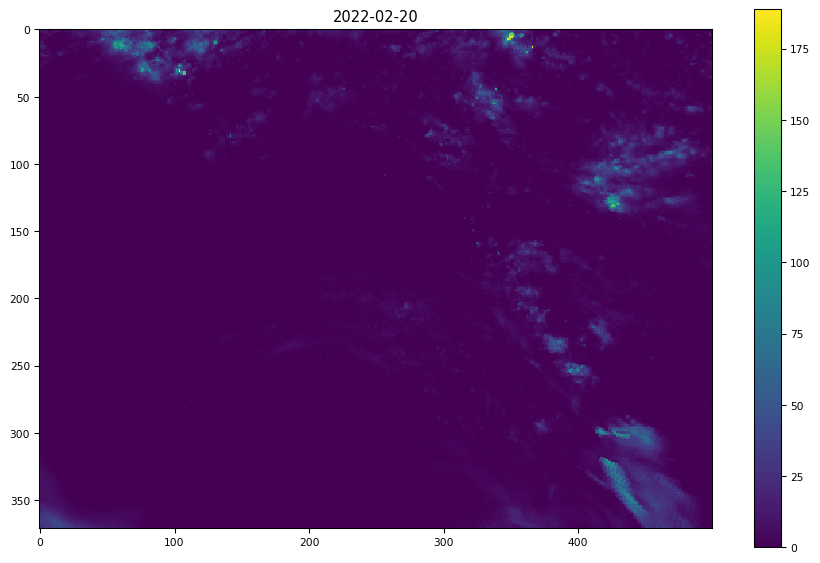

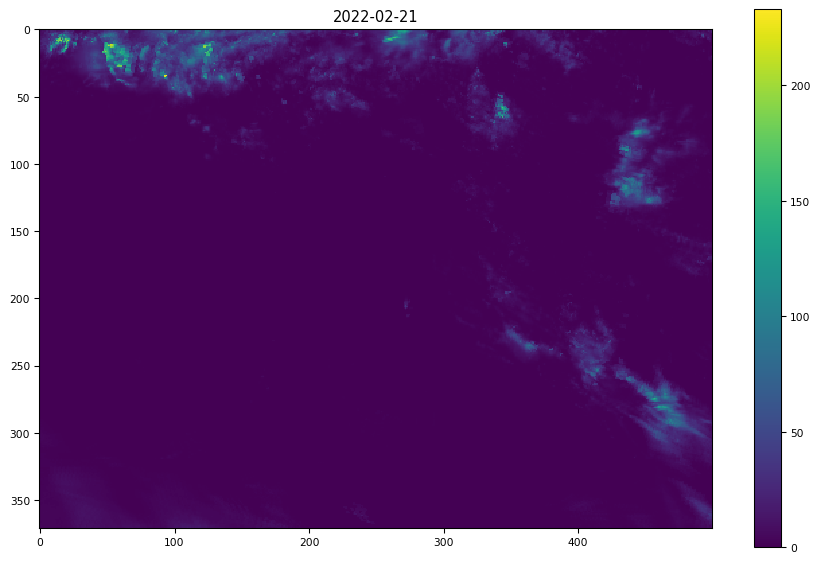

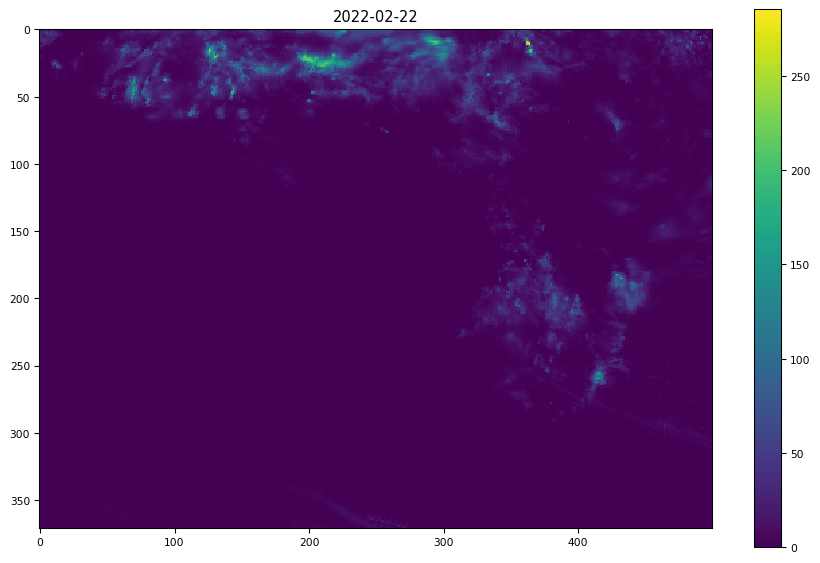

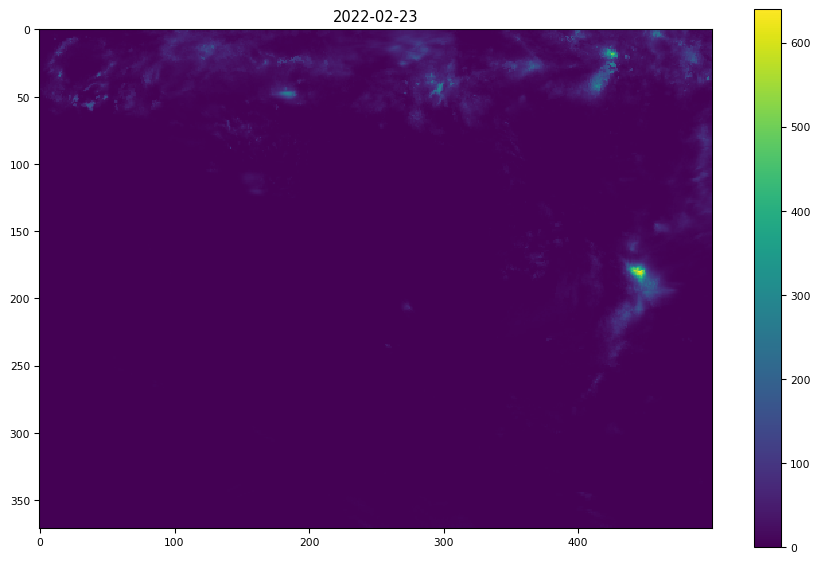

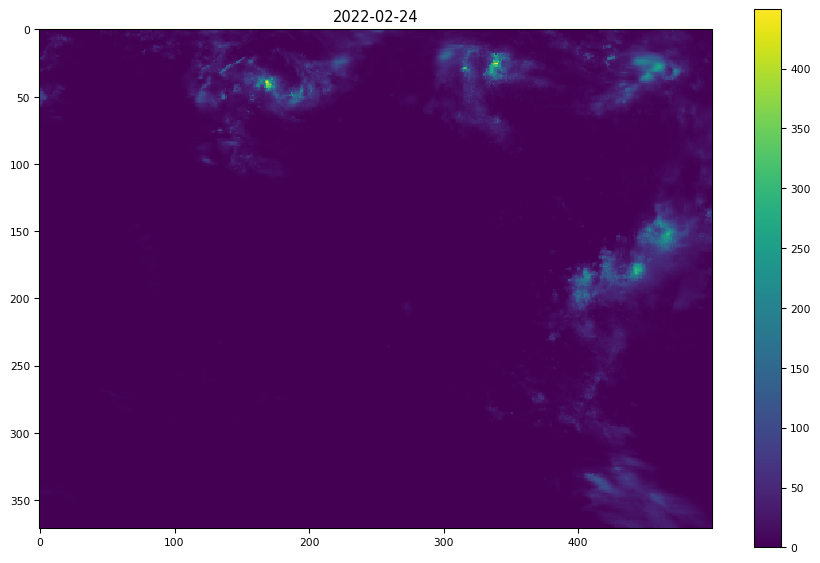

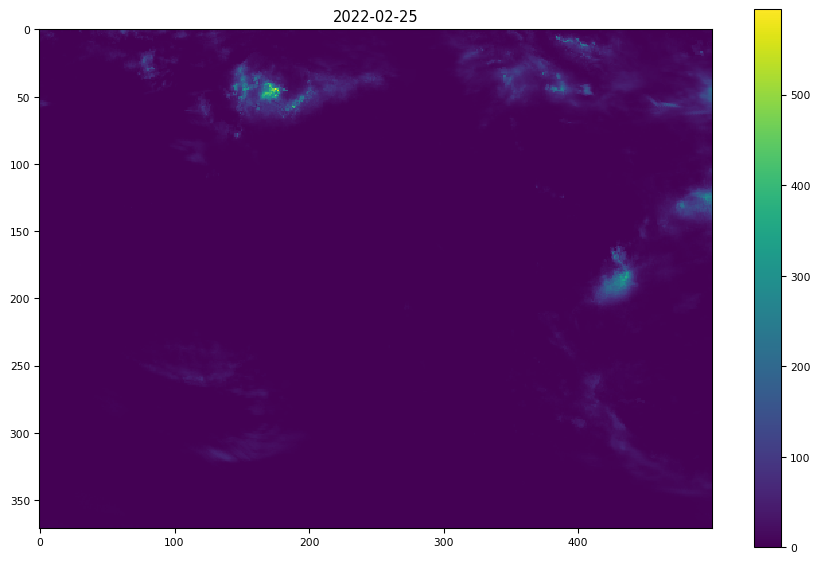

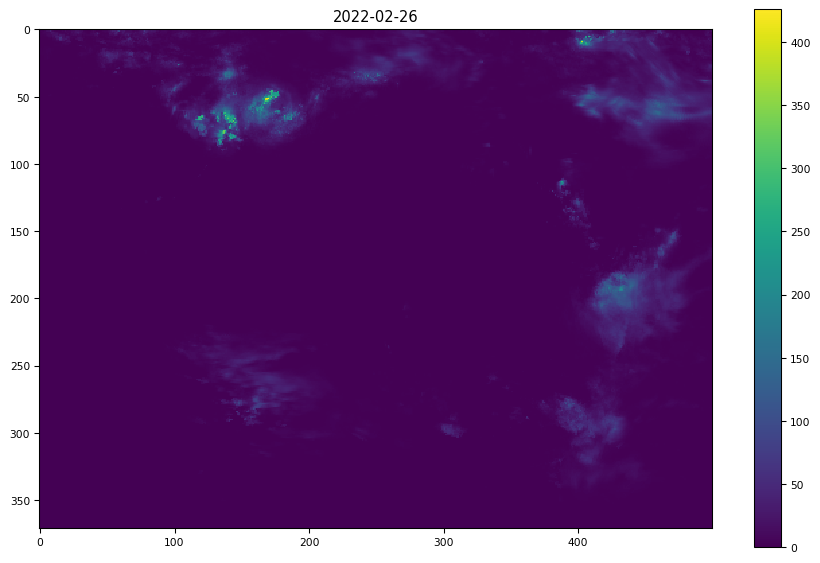

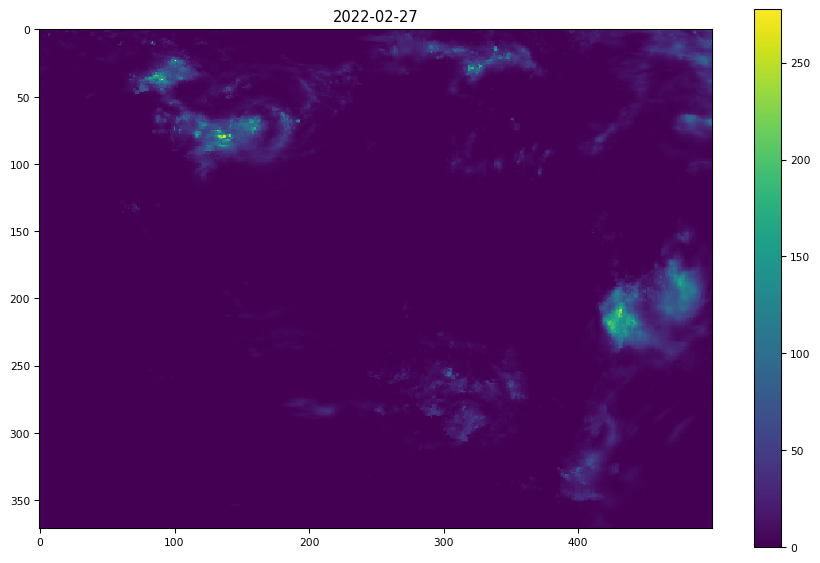

In [4]:
Frames =[ ]
for day in range(20 , 28):
    fp =  Folder_IMERG + r'3B-DAY-L.MS.MRG.3IMERG.'+r'2022' + r'02' + str(day) + r'-S000000-E235959.V06.nc4.nc4' 
    nc= netCDF4.Dataset(fp)
    frame = np.array(nc[band] )[0]
    frame = np.rot90(frame , 1 )
    Frames.append( frame)
    tff.imshow(frame  , title= r'2022-' + r'02-' + str(day)  ) 

In [15]:
Frames = [ ]
for f in files :
    fp_1 = Folder_PDIR + f
    PDIR_image = gdal.Open(fp_1)
    frame_1  = PDIR_image.ReadAsArray(0,0,PDIR_image.RasterXSize, PDIR_image.RasterYSize)
    Frames.append(frame_1)

NameError: name 'Folder_PDIR' is not defined

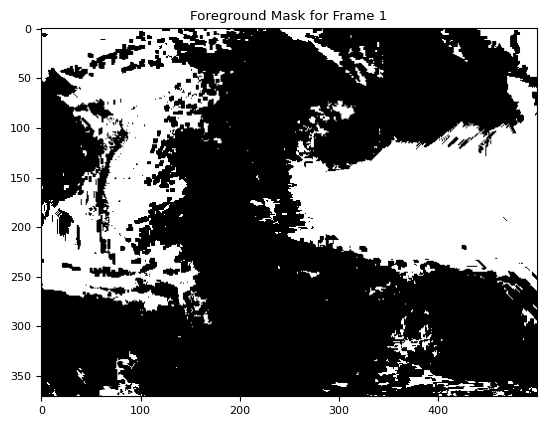

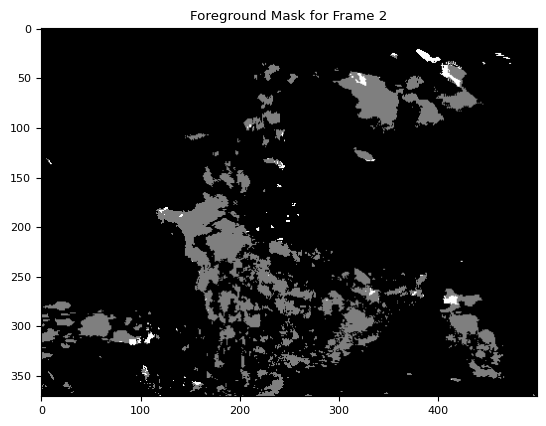

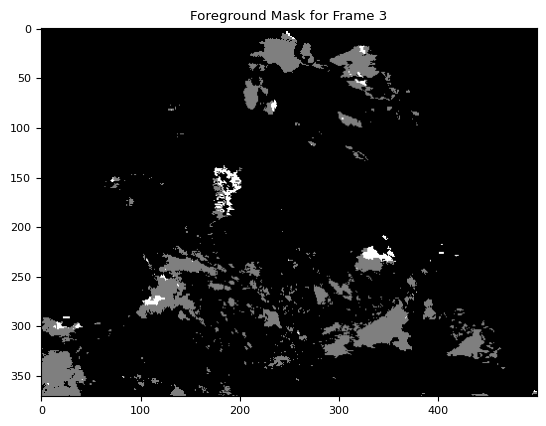

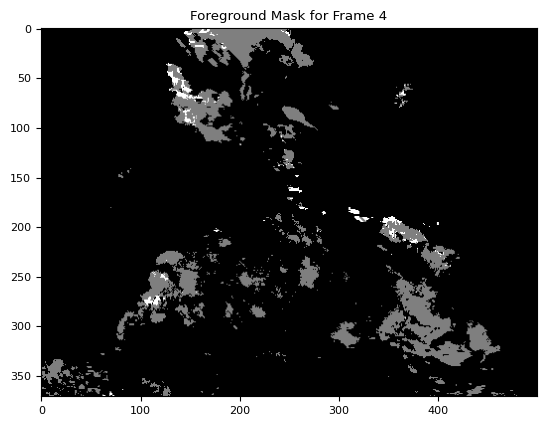

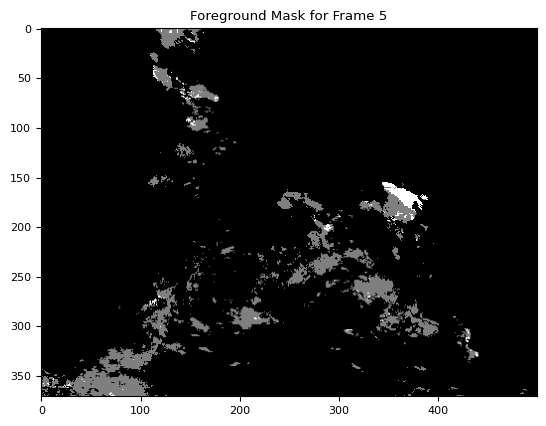

In [75]:
'''If your images are one-band NumPy arrays with positive values, you can still use the background subtraction techniques mentioned earlier. Here’s how you can adapt the code to work with one-band NumPy arrays:

Method 1: Using cv2.createBackgroundSubtractorMOG2

The MOG2 (Mixture of Gaussians) algorithm can be applied to one-band NumPy arrays.
'''
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize the background subtractor
backSub = cv2.createBackgroundSubtractorMOG2()

# Function to process a frame
def process_frame(frame):
    # Apply the background subtractor
    fg_mask = backSub.apply(frame)
    return fg_mask

# Simulate loading one-band NumPy arrays (replace with actual loading code)
frames = Frames

for i, frame in enumerate(frames):
    # Process the frame to get the foreground mask
    fg_mask = process_frame(frame)

    # Display the result
    plt.imshow(fg_mask, cmap='gray')
    plt.title(f'Foreground Mask for Frame {i+1}')
    plt.show()


In [ ]:

'''Method 2: Using cv2.createBackgroundSubtractorKNN

The KNN (K-Nearest Neighbors) algorithm can also be used with one-band NumPy arrays.'''

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize the background subtractor
backSub = cv2.createBackgroundSubtractorKNN()

# Function to process a frame
def process_frame(frame):
    # Apply the background subtractor
    fg_mask = backSub.apply(frame)
    return fg_mask

# Simulate loading one-band NumPy arrays (replace with actual loading code)
frames = [np.load('frame1.npy'), np.load('frame2.npy'), np.load('frame3.npy')]

for i, frame in enumerate(frames):
    # Process the frame to get the foreground mask
    fg_mask = process_frame(frame)

    # Display the result
    plt.imshow(fg_mask, cmap='gray')
    plt.title(f'Foreground Mask for Frame {i+1}')
    plt.show()


# Background Subtrction

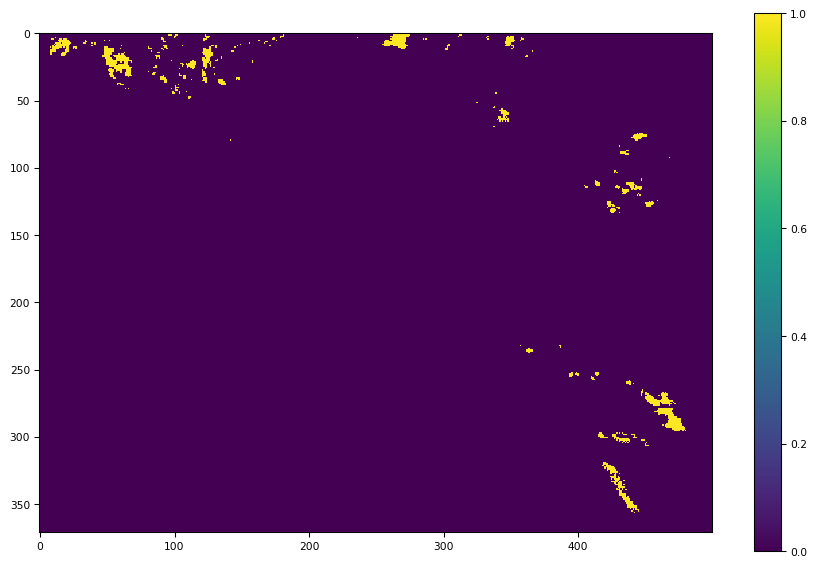

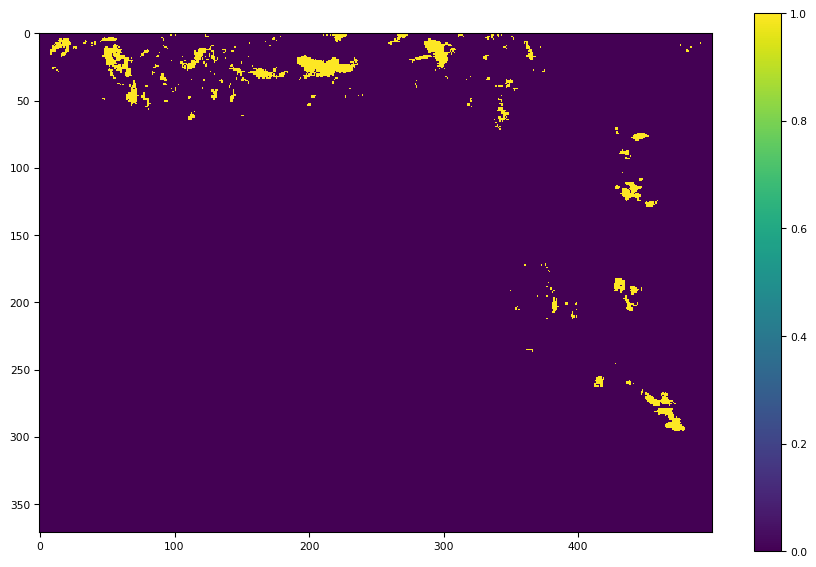

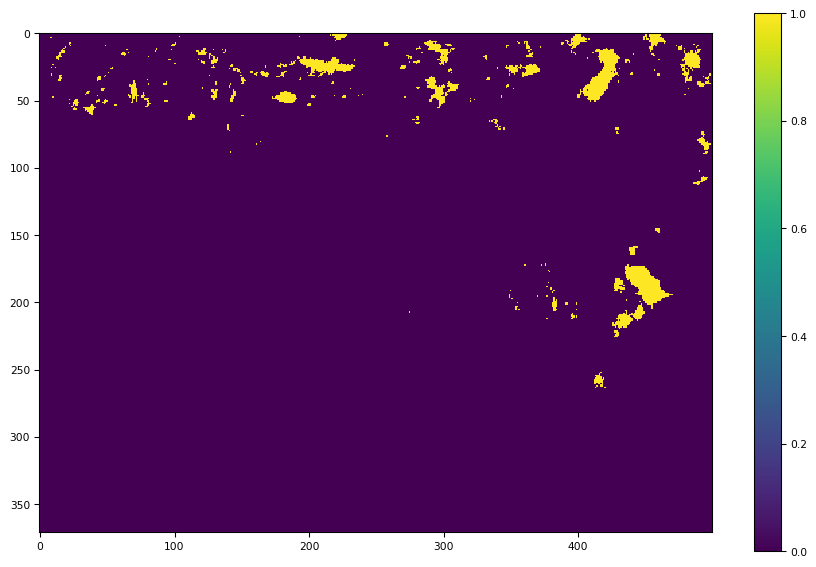

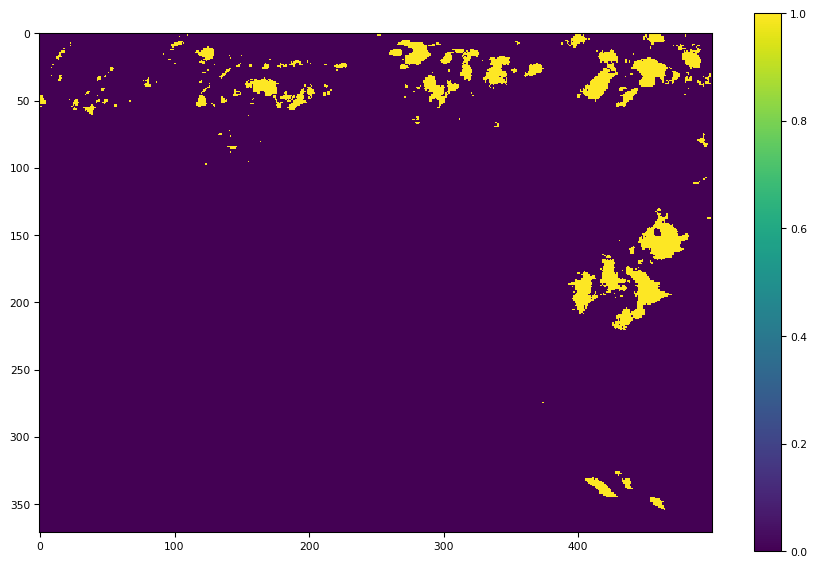

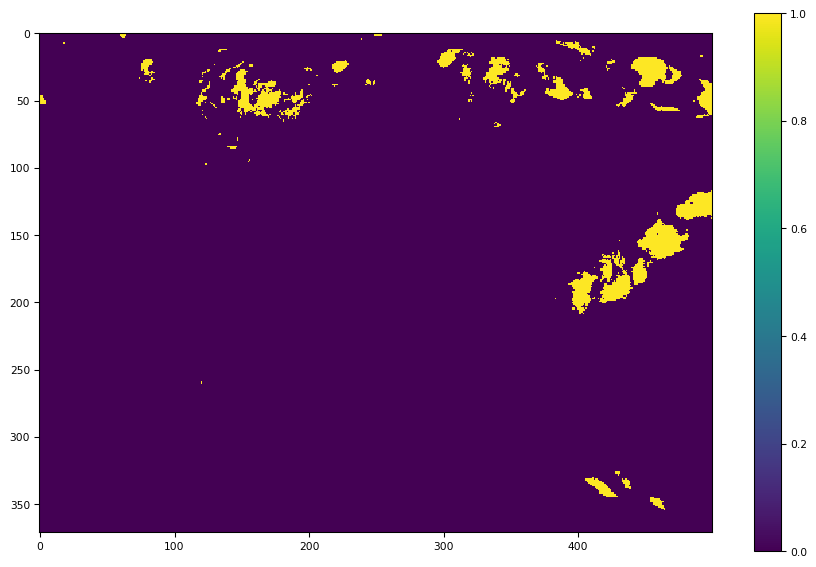

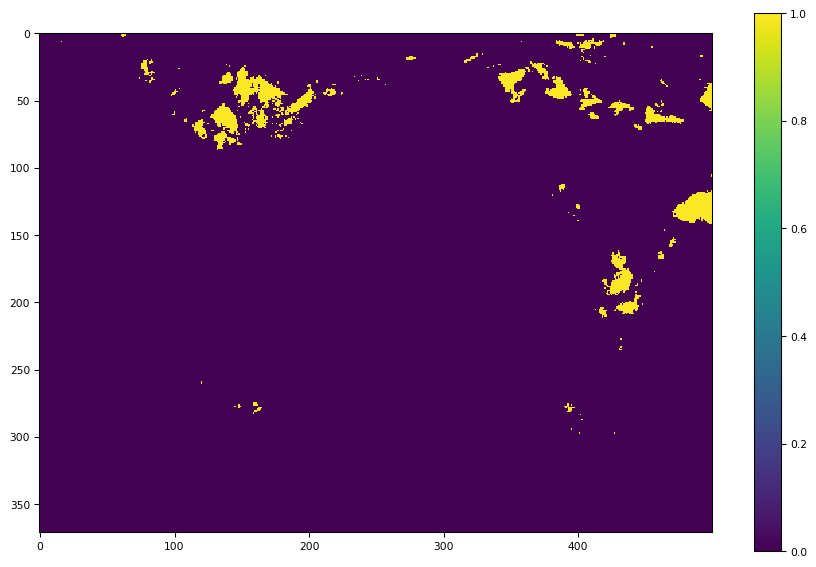

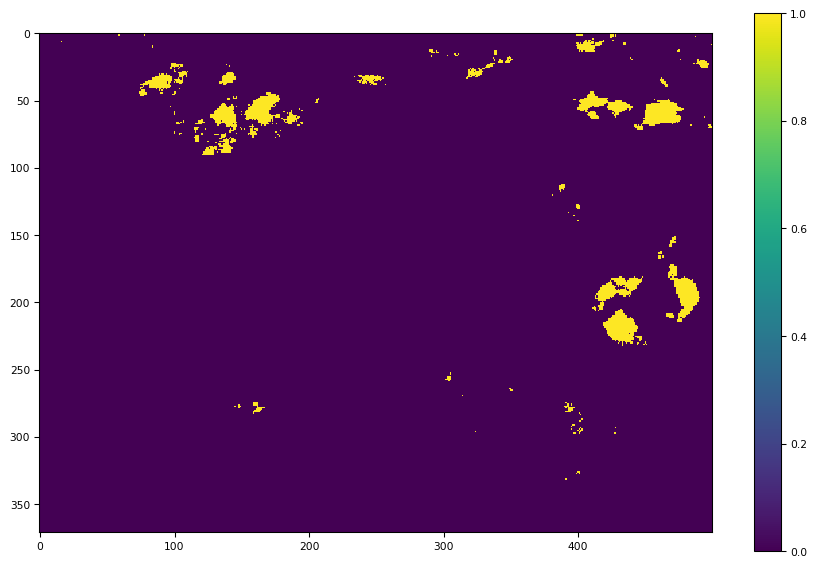

In [25]:
'''
Method 3: Using Static Background Subtraction

If you have a static background image, you can subtract it directly from each frame.
'''

import numpy as np
import matplotlib.pyplot as plt

# Load the static background image (replace with actual loading code)

# Function to process a frame
def process_frame(frame, background):
    # Compute the absolute difference between the frame and the background
    diff = np.abs(frame - background)
    # Apply a binary threshold to the difference image
    threshold =  60 # Adjust this value based on your data
    fg_mask = diff > threshold
    return fg_mask.astype(np.uint16) 

# Simulate loading one-band NumPy arrays (replace with actual loading code)
frames =  Frames
out_images = [ ]
for i in range(1,len(frames)):
    # Process the frame to get the foreground mask
    background = frames[i-1]
    fg_mask = process_frame(frames[i], background)
    out_images.append(fg_mask)
    tff.imshow(fg_mask)
    # Display the result



In [26]:
np.unique(fg_mask)

array([0, 1], dtype=uint16)

In [27]:
def max_min( x) : return (x - x.min() ) / (x.max() - x.min())
def mean_std(x)  : return (x- x.mean()) / (x.std())

images = []
Shape = out_images[0].shape

lat = np.array( np.arange(0 , Shape[0]  , 1 )  )
lat_im = np.array( [lat] * Shape[1]  ).T
lon =  np.array( np.arange(0 , Shape[1]  , 1 )  )
lon_im = np.array([lon] *Shape[0]) 

lat_im = max_min(lat_im) 
lat_im  =  mean_std(lat_im)
lat_im = max_min(lat_im) 
lat_im  =  mean_std(lat_im)


lon_im = max_min(lon_im)
lon_im = mean_std(lon_im)
lon_im = max_min(lon_im)
lon_im = mean_std(lon_im)


for fg_mask in out_images:
    image = fg_mask
    image = np.array([image , lat_im , lon_im] )
    images.append(image)

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Introduction
# The goal is to segment a three-band image (with shape (3, rows, columns)) into patches using K-means clustering,
# excluding pixels where the first band contains zero values.

# Materials and Methods
# Materials: Generate a three-band image with shape (3, 200, 200)
# For demonstration purposes, we'll generate a random three-band image with positive float values
# Example: a 3x200x200 image
# Introduce some zero values in the first band for demonstration

# Methods: Define the number of clusters for K-means
num_clusters = 4  # Example: segment the image into 4 clusters

# Procedure
# Step 1: Load the image
# If you have an actual image file, you'd load it and then ensure it has shape (3, rows, columns)
# image = io.imread('path_to_image')
# image = np.transpose(image, (2, 0, 1))  # Convert to (3, rows, columns) if needed

# Step 2: Create a mask to exclude pixels where the first band is zero
i = 0
for image in images : 
    print(files[i])
    i += 1
    mask = image[0] != 0

    # Step 3: Reshape the image for clustering, excluding masked pixels
    pixels = image[:, mask].T  # Transpose to shape (n_pixels, 3)

    # Step 4: Apply K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(pixels)
    labels = kmeans.labels_

    # Step 5: Reshape the clustered labels back to the image shape
    segmented_image = np.zeros(image.shape[1:], dtype=int)
    segmented_image[mask] = labels

    # Step 6: Visualize the segmented image
    plt.imshow(segmented_image, cmap='viridis')
    plt.title('Segmented Image')
    plt.show()

    # Extract patches based on cluster labels
    # For simplicity, we'll extract patches for each cluster
    patches = []
    for cluster in range(num_clusters):
        cluster_mask = (segmented_image == cluster)
        cluster_patches = np.zeros_like(image)
        for i in range(3):  # Apply the mask to each channel
            cluster_patches[i, cluster_mask] = image[i, cluster_mask]
        patches.append(cluster_patches)

    # Results
    # Display the patches for each cluster
    for i, patch in enumerate(patches):
        plt.imshow(patch.transpose(1, 2, 0))
        plt.title(f'Patches for Cluster {i}')
        plt.show()


# K-MEANS++

3B-DAY-L.MS.MRG.3IMERG.20000601-S000000-E235959.V06.nc4.nc4


TypeError: Invalid shape (500,) for image data

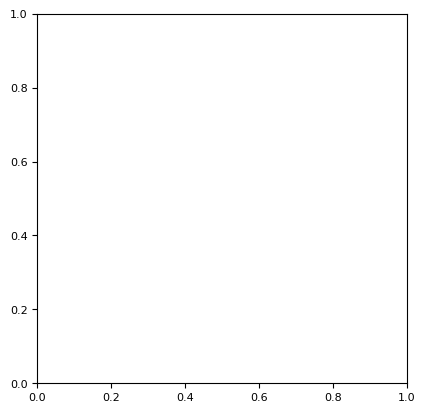

In [5]:


'''Step 1: Load the image.
Step 2: Create a mask to exclude pixels where the first band is zero.
Step 3: Reshape the image for clustering.
Step 4: Apply K-means clustering.
Step 5: Reshape the clustered labels back to the image shape.
Step 6: Extract patches based on cluster labels.
Step 7: Display all clusters in one plot.

Results:
Analyse the segmented image and extracted patches to ensure correctness.

Discussion:
Confirm the effectiveness of the method and discuss potential improvements or applications.
Implementation

Here's a detailed implementation based on the above structure, assuming the input image shape is (3, rows, columns):
'''
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Introduction
# The goal is to segment a three-band image (with shape (3, rows, columns)) into patches using K-means clustering,
# excluding pixels where the first band contains zero values, and display all clusters in one plot.

# Materials and Methods
# Materials: Generate a three-band image with shape (3, 200, 200)
# For demonstration purposes, we'll generate a random three-band image with positive float values
# Example: a 3x200x200 image
# Introduce some zero values in the first band for demonstration

# Methods: Define the number of clusters for K-means


# Procedure
# Step 1: Load the image
# If you have an actual image file, you'd load it and then ensure it has shape (3, rows, columns)
# image = io.imread('path_to_image')
# image = np.transpose(image, (2, 0, 1))  # Convert to (3, rows, columns) if needed

# Step 2: Create a mask to exclude pixels where the first band is zero

i = 0
num_clusters = 4  # Example: segment the image into 4 clusters
for image in Frames : 

    print(files[i])
    i += 1
    mask = image[0] != 0
    pixels = image[:, mask].T  # Transpose to shape (n_pixels, 3)

    # Step 4: Apply K-means clustering
    kmeans = KMeans(algorithm='elkan', copy_x=True, init='k-means++', 
                    max_iter=1000,n_clusters = num_clusters, n_init=10, random_state=None, tol=0.000001, verbose=0  ).fit(pixels)  #  (n_clusters=num_clusters, random_state=0  ).fit(pixels)
    
    labels = kmeans.labels_

    # Step 5: Reshape the clustered labels back to the image shape
    segmented_image = np.zeros(image.shape[1:], dtype=int)

    segmented_image[mask] = labels

    # Step 6: Output a one-band image where each pixel consists of the patch ID
    # Create a discrete colormap
    cmap = ListedColormap(['white', 'green', 'blue', 'yellow' , 'red' , 'cyan' , 'black'  , 'Orange'][0:num_clusters])

    

    plt.imshow(segmented_image, cmap=cmap)
    plt.title('Segmented Image with Patch IDs')
    cbar = plt.colorbar(ticks=range(num_clusters))
    cbar.set_label('Patch ID')
    plt.show()

# Discussion
# The method effectively segments the image into patches based on pixel intensity and colour,
# excluding pixels where the first band contains zero values.
# Potential improvements could include refining the clustering process or applying additional image preprocessing steps.

'''Explanation:
Introduction: Defines the problem and objective.
Materials and Methods: Describes the tools and techniques used.
Procedure: Detailed steps to achieve the objective:
Step 1: Load the image. Here, we generate a random image for demonstration and introduce some zero values in the first band.
Step 2: Create a mask to exclude pixels where the first band is zero.
Step 3: Reshape the image for clustering, excluding masked pixels.
Step 4: Apply K-means clustering to segment the image.
Step 5: Reshape the clustered labels back to the original image shape.
Step 6: Extract patches based on cluster labels.
Step 7: Display all clusters in one plot using subplots.
Results: Visualises the segmented image and patches for each cluster.
Discussion: Confirms the effectiveness and suggests potential improvements.
'''


In [8]:
segmented_image.shape


(500,)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<Figure size 988.8x604.8 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x288b0166690>)

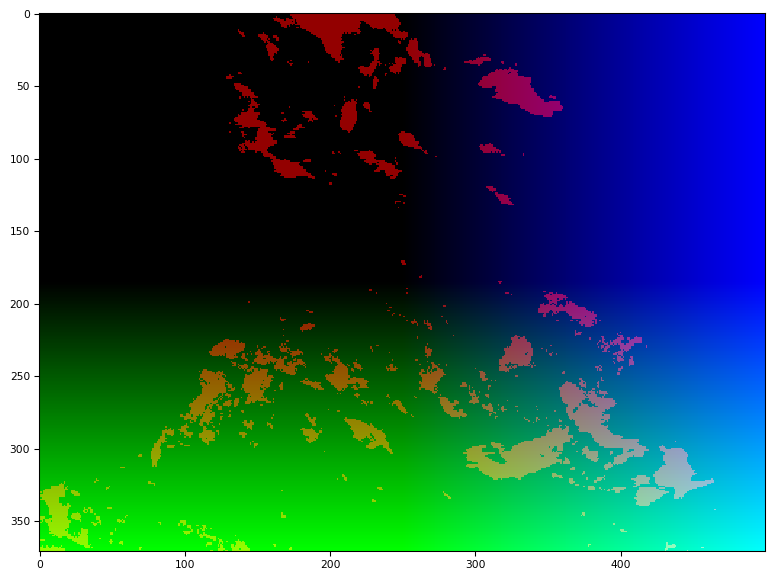

In [150]:
tff.imshow(image)

In [136]:
pixels.shape

(13620, 3)

In [94]:
tff.imwrite(r"D:\Projects\precipitation_AUS\patches/p0.tif" , patches[0])

# 3. Optical Flow


'\nNotes:\n    Ensure that your images are loaded as NumPy arrays with positive values.\n    Adjust the threshold values and parameters based on your specific data characteristics.\n    If your images are not in a format directly readable by OpenCV or other libraries, you may need to convert them appropriately (e.g., using np.load for .npy files).\n'

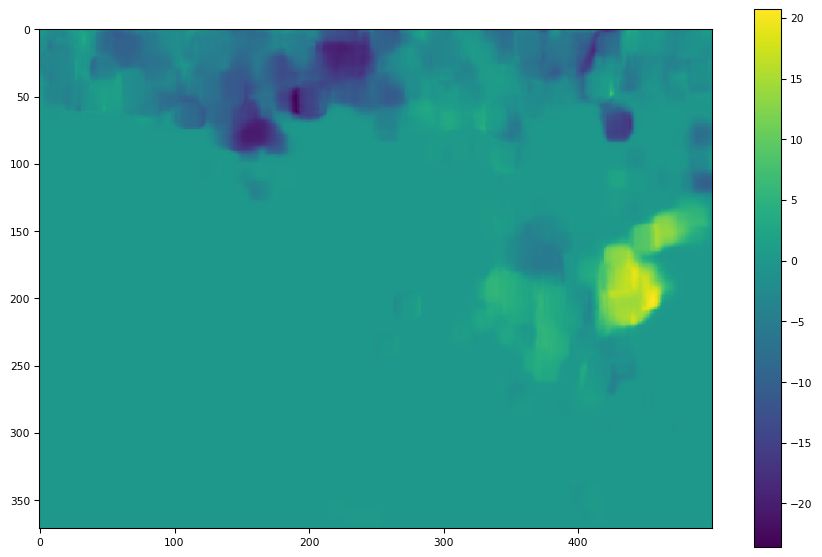

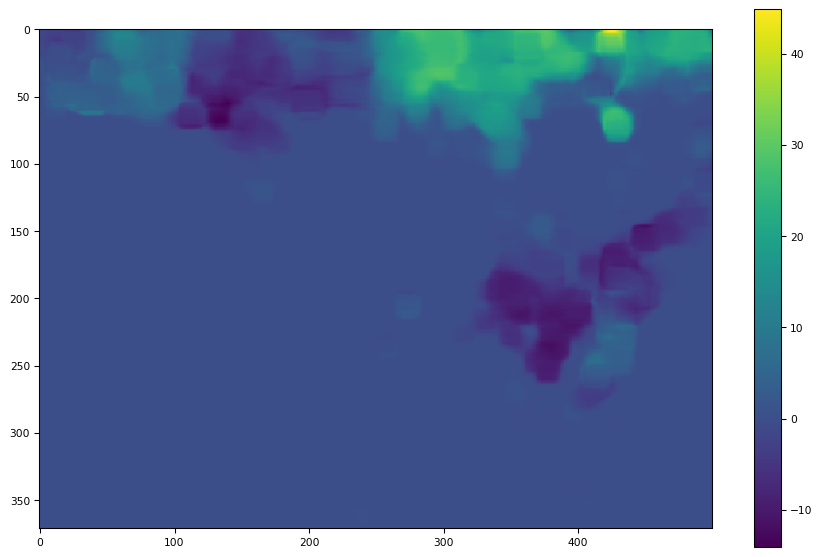

In [37]:
'''
3. Optical Flow
Optical flow can be used to estimate the motion of objects between consecutive frames. Here’s an example using the Farneback method:
'''

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two consecutive frames (assuming they are NumPy arrays with positive values)
i = 2
frame1 = Frames[i]
frame2 = Frames[i+1]

# Compute the dense optical flow using Farneback method
flow = cv2.calcOpticalFlowFarneback(frame1, frame2, None, 0.5, 3, 15, 3, 5, 1.2, 0)

# Convert flow to magnitude and angle
magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
teta = flow[: , :, 1]
teta[teta == 0  ]  = np.nan
tff.imshow(flow[: ,:  ,0])
tff.imshow(teta)
# Create an HSV image
hsv = np.zeros((frame1.shape[0], frame1.shape[1], 3), dtype=np.uint8)
hsv[..., 1] = 255

# Set hue according to the optical flow direction
hsv[..., 0] = angle * 180 / np.pi / 2

# Set value according to the optical flow magnitude
hsv[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Convert HSV to RGB
rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

# Display the result
'''plt.imshow(rgb)
plt.title('Optical Flow')
plt.show()
'''

'''
Notes:
    Ensure that your images are loaded as NumPy arrays with positive values.
    Adjust the threshold values and parameters based on your specific data characteristics.
    If your images are not in a format directly readable by OpenCV or other libraries, you may need to convert them appropriately (e.g., using np.load for .npy files).
'''

# 2. Convolutional Autoencoder Model
Create a Convolutional Autoencoder model using TensorFlow/Keras.
Step-by-Step Guide
1. Install Required Libraries

In [7]:
import numpy as np

# Example function to load your dataset
def load_dataset():
    # Replace with actual loading code
    sequences = [
        [frame_1, frame_2, frame_3, frame_4],
        [frame_1, frame_2, frame_3, frame_4],
        # Add more sequences as needed
    ]
    return sequences

# Load the dataset
sequences = load_dataset()

# Prepare the input data
input_data = []

for sequence in sequences:
    input_data.append(np.stack(sequence, axis=0))

# Convert to NumPy arrays and normalize
input_data = np.array(input_data) / 255.0

# Reshape to match the expected input shape for ConvLSTM2D (batch_size, time_steps, height, width, channels)
input_data = input_data.reshape((-1, 4, input_data.shape[2], input_data.shape[3], 1))

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, TimeDistributed, ConvLSTM2D, BatchNormalization

# Define the encoder
input_img = Input(shape=(4, input_data.shape[2], input_data.shape[3], 1))
x = TimeDistributed(Conv2D(16, (3, 3), activation='relu', padding='same'))(input_img)
x = TimeDistributed(Conv2D(32, (3, 3), activation='relu', padding='same'))(x)
x = TimeDistributed(Conv2D(64, (3, 3), activation='relu', padding='same'))(x)
encoded = TimeDistributed(Conv2D(128, (3, 3), activation='relu', padding='same'))(x)

# Define the decoder
x = TimeDistributed(Conv2DTranspose(64, (3, 3), activation='relu', padding='same'))(encoded)
x = TimeDistributed(Conv2DTranspose(32, (3, 3), activation='relu', padding='same'))(x)
x = TimeDistributed(Conv2DTranspose(16, (3, 3), activation='relu', padding='same'))(x)
decoded = TimeDistributed(Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same'))(x)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Print the model summary
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4, 942, 1386,   │             0 │
│                                 │ 1)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 4, 942, 1386,   │           160 │
│ (TimeDistributed)               │ 16)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 4, 942, 1386,   │         4,640 │
│ (TimeDistributed)               │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 4, 942, 1386,   │        18,496 │
│ (TimeDistributed)               │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 4, 942, 1386,   │        73,856 │
│ (TimeDistributed)               │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 4, 942, 1386,   │        73,792 │
│ (TimeDistributed)               │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 4, 942, 1386,   │        18,464 │
│ (TimeDistributed)               │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, 4, 942, 1386,   │         4,624 │
│ (TimeDistributed)               │ 16)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_7              │ (None, 4, 942, 1386,   │           145 │
│ (TimeDistributed)               │ 1)                     │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 194,177 (758.50 KB)

 Trainable params: 194,177 (758.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
autoencoder.fit(input_data, input_data, epochs=100, batch_size=4, validation_split=0.2)


Epoch 1/100


In [ ]:
new_sequence = [
    np.load('new_sequence_frame1.npy'),
    np.load('new_sequence_frame2.npy'),
    np.load('new_sequence_frame3.npy'),
    np.load('new_sequence_frame4.npy')
]

# Prepare the input data
new_input_data = np.stack(new_sequence, axis=0) / 255.0
new_input_data = new_input_data.reshape(1, 4, new_input_data.shape[1], new_input_data.shape[2], 1)

# Predict the next frame
predicted_sequence = autoencoder.predict(new_input_data)

# Extract the predicted fifth frame (the last frame in the output sequence)
predicted_frame = predicted_sequence[0, -1]

# Reshape and denormalize the predicted frame if needed
predicted_frame = (predicted_frame * 255).astype(np.uint8)

# Display the predicted frame
import matplotlib.pyplot as plt
plt.imshow(predicted_frame, cmap='gray')
plt.title('Predicted Frame')
plt.show()

# 3. Optical Flow Prediction


"# Reshape and denormalize the predicted frame if needed\npredicted_frame = (predicted_frame * 255).astype(np.uint8)\n\n# Display the predicted frame\nplt.imshow(predicted_frame, cmap='gray')\nplt.title('Predicted Frame')\nplt.show()"

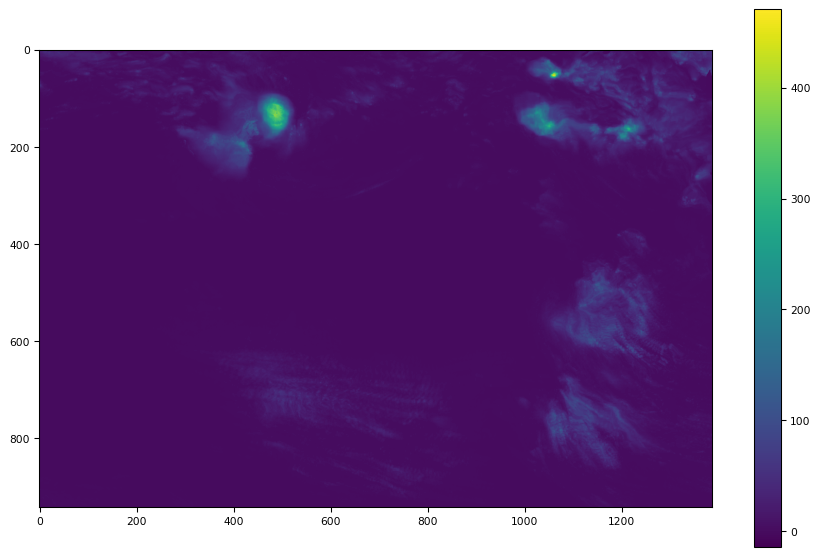

In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load your 4 images (replace with actual loading code)
images =  Frames[0:4] 

# Normalize the images if needed

# 3. Compute Optical Flow
# Compute the optical flow between the last two frames.

# Convert images to float32 for optical flow calculation
prev_frame = images[2].astype(np.float32)
next_frame = images[3].astype(np.float32)

# Compute the dense optical flow using Farneback method
flow = cv2.calcOpticalFlowFarneback(prev_frame, next_frame, None, 0.5, 3, 15, 3, 5, 1.2, 0)
#4. Warp the Last Frame
#Use the optical flow to warp the last frame to predict the next frame.

# Get the flow components
flow_x, flow_y = flow[..., 0], flow[..., 1]

# Create mesh grid for pixel coordinates
h, w = prev_frame.shape
x, y = np.meshgrid(np.arange(w), np.arange(h))

# Compute the new pixel locations based on the flow
new_x = (x + flow_x).astype(np.float32)
new_y = (y + flow_y).astype(np.float32)

# Warp the last frame using the flow
predicted_frame = cv2.remap(next_frame, new_x, new_y, interpolation=cv2.INTER_LANCZOS4)

tff.imshow(predicted_frame)


''''Parameters
src: The source image that you want to transform.
map1: The first mapping array. This array contains the x-coordinates of the destination image corresponding to the source image.
map2: The second mapping array. This array contains the y-coordinates of the destination image corresponding to the source image.
interpolation: The interpolation method to be used. Common options include:
cv2.INTER_LINEAR: Linear interpolation (default).
cv2.INTER_NEAREST: Nearest-neighbor interpolation.
cv2.INTER_CUBIC: Cubic interpolation.
cv2.INTER_LANCZOS4: Lanczos interpolation over 8x8 neighborhood.'''



'''# Reshape and denormalize the predicted frame if needed
predicted_frame = (predicted_frame * 255).astype(np.uint8)

# Display the predicted frame
plt.imshow(predicted_frame, cmap='gray')
plt.title('Predicted Frame')
plt.show()'''

(<Figure size 988.8x604.8 with 2 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x26493391810>)

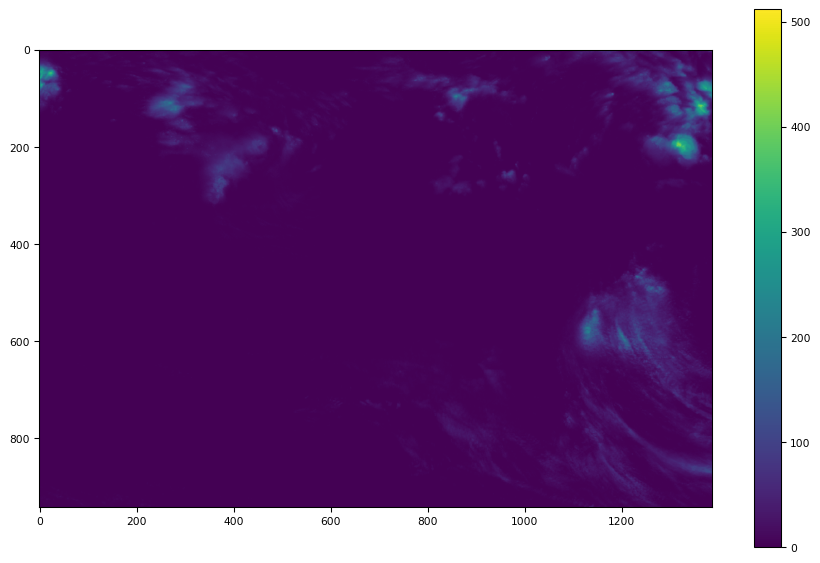

In [21]:
tff.imshow(Frames[4])